**From a series of application of modern interpolation methods for economics: written by [Mahdi E Kahou](https://sites.google.com/site/mahdiebrahimikahou/about-me)**


# Goal of this notebook  

The purpose of this notebook is to demonstrate:  
1. How to numerically calculate the integral of a univariate function, $v(x)$.  
2. How to apply the Gauss–Legendre quadrature method for this task.  
3. Since these lecture notes focus on machine learning methods, we will emphasize the case where $v(x)$ is represented by a neural network.

---

## The Problem

Consider a function $v: \mathbb{R} \to \mathbb{R}$.  
We are interested in numerically computing  

$$
\int_{a}^b v(x)\,dx.
$$

---

## Gauss-Legendre Quadrature

This method approximates the integral by calculating a weighted sum of the function values at specific points, called **nodes**:

$$
\int_{-1}^1 v(x)\,dx \;\approx\; \sum_{i=1}^n w_i\,v(x_i).
$$

- $n$: the number of nodes  
- $w_i$: the quadrature weights  
- $x_i$: the nodes, which are the roots of the $n$-th Legendre polynomial
---
**Important note:** The original goal is to calculate the integral over $[a, b]$.  The formula above, however, is defined on $[-1, 1]$. 

This will be addressed later in the notebook using an appropriate change of variables.

---

## How to implement it in Python

The `NumPy` function that provides Gauss–Legendre quadrature nodes and weights is  

`np.polynomial.legendre.leggauss(n)`,  

where $n$ is the number of nodes.

---

## Simple examples

### Example 1:

Consider the function $v(x) = x^2$.  
The integral can be computed analytically as  

$$
\int_{-1}^{1} v(x) \, dx = \frac{2}{3}.
$$

Let's implement this in Python:

In [1]:
# importing packages we need
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def v(x):
    return x**2
 
n = 3
 
nodes, weights = np.polynomial.legendre.leggauss(n)
 
approximation = sum(weights * v(nodes))
 
print("Approximated integral:", approximation)

Approximated integral: 0.666666666666667


### Example 2:  
Let's try something **more challenging**.  

Consider the function $v(x) = \max\{0.5, x\}$.  

The integral can be computed analytically as  

$$
\int_{-1}^{1} v(x) \, dx = \frac{9}{8} = 1.125.
$$

Let's first visualize the function.

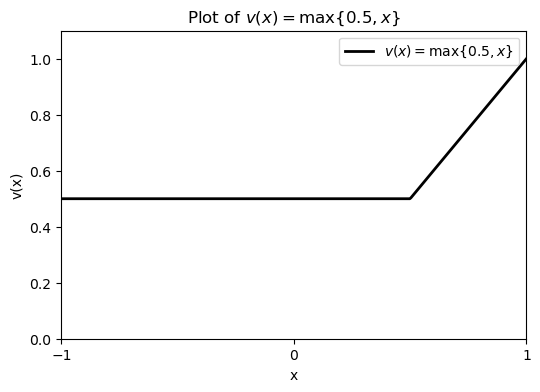

In [3]:
def v(x):
    return np.maximum(0.5, x)

# Create grid
x = np.linspace(-1, 1, 400)
y = v(x)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, label=r'$v(x) = \max\{0.5, x\}$', color='k', lw=2)

# Customize x-axis
plt.xticks([-1, 0, 1])
plt.xlim(-1, 1)
plt.ylim(0, 1.1)


# Labels and title
plt.xlabel('x')
plt.ylabel('v(x)')
plt.title('Plot of $v(x) = \max\{0.5, x\}$')
plt.legend()

plt.show()

In [4]:
n = 10

def v(x):
    return np.maximum(0.5, x)
    
nodes, weights = np.polynomial.legendre.leggauss(n)
 
approximation = sum(weights * v(nodes))
 
print("Approximated integral:", approximation)

Approximated integral: 1.1254613877292212


### Why is this a challenging example?

As you can see, we need to increase the number of nodes to get closer to the true integral value.  
This is because $v(x) = \max\{0.5, x\}$ has a kink at $x = 0.5$; the function is continuous but not differentiable at this point. 

So in some sense it is not smooth. For more detials see [Art Owen's lecture notes](https://artowen.su.domains/mc/Ch-quadrature.pdf).

---

## Going from $\int_{-1}^1 v(x)\, dx ~$ to $~\int_{a}^b v(x)\, dx$.

Consider the original problem  

$$
\int_{a}^b v(x)\, dx.
$$  

We apply the change of variable  

$$
s = \frac{2}{b-a}x - \frac{a+b}{b-a}.
$$  

Then,  

$$
\begin{aligned}
dx &= \frac{b-a}{2}\, ds, \\
x &= \frac{b-a}{2}\,s + \frac{a+b}{2}.
\end{aligned}
$$  

Substituting into the integral gives  

$$
\int_a^b v(x)\, dx 
= \int_{-1}^1 \tilde{v}(s)\, ds,
$$  

where  

$$
\tilde{v}(s) = \frac{b-a}{2}\, v\!\left(\tfrac{b-a}{2}s + \tfrac{a+b}{2}\right).
$$  




Now that we have transformed the problem into a form suitable for applying the quadrature method, we can write

$$
\int_{a}^b v(x)\, dx 
= \sum_{i=1}^n w_i\, \tilde{v}(x_i) 
= \frac{b-a}{2} \sum_{i=1}^n w_i\, v\!\left(\tfrac{b-a}{2}x_i + \tfrac{a+b}{2}\right).
$$  

---
Next, we implement this numerically.


In [5]:
def int_quad_gl(v,a,b,n):
    # v: the function
    # a: lower bound of the integral
    # b: upper bound of the integral
    # n: number of the nodes
    nodes, weights = np.polynomial.legendre.leggauss(n)
    adjusted_nodes = ( ( (b-a)/2 )*nodes ) + ( (a+b)/2 )
    approximation = ((b-a)/2)*sum(weights * v(adjusted_nodes))
    return approximation

    
    
    

## Simple examples
### Example 3:

Consider the function $v(x) = x^2$.  
The integral can be computed analytically as  

$$
\int_{0}^{3} v(x) \, dx = 9.
$$


In [6]:
def v(x):
    return x**2

In [7]:
int_quad_gl(v = v,a = 0, b=3 ,n = 3)

9.000000000000002

### Example 4:  
Consider the function $v(x) = \max\{0.5, x\}$.  

The integral can be computed analytically as  

$$
\int_{-2}^{4} v(x) \, dx = \frac{9}{8} = 9.125.
$$


In [8]:
def v(x):
    return np.maximum(0.5, x)
    
int_quad_gl(v = v,a = -2, b=4 , n = 15)

9.121070599750608

## Integration of a neural network

Let $v:\mathbb{R}\to\mathbb{R}$ be a neural network.  
There is **nothing special** about using a neural network here. The procedure is exactly the same as before, except that we use **PyTorch** and tensors.

---
Let's implement it.

First let's construct a neural network

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class NN(nn.Module):
    def __init__(self,
                 dim_hidden = 128,
                layers = 1,
                hidden_bias = True):
        super().__init__()
        self.dim_hidden= dim_hidden
        self.layers = layers
        self.hidden_bias = hidden_bias

        torch.manual_seed(123)
        module = []
        module.append(nn.Linear(1,self.dim_hidden, bias = self.hidden_bias))
        module.append(nn.Tanh())

        for i in range(self.layers-1):
            module.append(nn.Linear(self.dim_hidden,self.dim_hidden, bias = self.hidden_bias))
            module.append(nn.Tanh())

        module.append(nn.Linear(self.dim_hidden,1))
        module.append(nn.Softplus(beta = 1.0)) 

        self.q = nn.Sequential(*module)


    def forward(self, x):
        out = self.q(x) # first element is consumption, the second element is capital
        return  out

In [11]:
v_nn = NN()

In [12]:
def int_quad_gl_tensor(v, a, b, n):
    # v: the neural network (or any callable)
    # a: lower bound of the integral
    # b: upper bound of the integral
    # n: number of the nodes
    nodes, weights = np.polynomial.legendre.leggauss(n)
    nodes_tensor = torch.tensor(nodes, dtype=torch.float32).unsqueeze(-1)
    weights_tensor = torch.tensor(weights, dtype=torch.float32).unsqueeze(-1)
    adjusted_nodes = ((b - a) / 2) * nodes_tensor + ((a + b) / 2)
    approximation = ((b - a) / 2) * torch.sum(weights_tensor * v(adjusted_nodes))
    return approximation


In [13]:
int_quad_gl_tensor(v = v_nn,a = 0, b = 3, n = 5)

tensor(1.0491, grad_fn=<MulBackward0>)

## Comparing it with Monte-carlo

At the end of the day, we want to use this integral to calculate the expectation of a neural network with respect to a uniform distribution.

Let `x` come from a uniform distribution with support `[a, b]`, then

$$
\mathbb{E}[v(x)] = \frac{1}{b-a}\int_{a}^b v(x)\,dx
$$

Therefore,

$$
\int_{a}^b v(x)\,dx = (b-a) \, \mathbb{E}[v(x)]
$$

Using the **law of large numbers**, we can approximate

$$
\int_{a}^b v(x)\,dx \approx (b-a) \frac{1}{N} \sum_{i=1}^N v(x_i)
$$

where $\{x_i\}_{i=1}^N$ are drawn from $\mathcal{U}[a,b]$.


In [14]:
def int_LLN(v,a,b,N):
    x_samples = (b - a) * torch.rand(N, 1) + a
    v_values = v(x_samples)
    integral = (b-a)*v_values.mean()
    return integral


In [15]:
int_LLN(v= v_nn,a = 0, b = 3, N = 100)

tensor(1.1044, grad_fn=<MulBackward0>)

In [16]:
int_quad_gl_tensor(v = v_nn,a = 0, b = 3, n = 5)

tensor(1.0491, grad_fn=<MulBackward0>)